<h3> Importing Important Libraries </h3>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import pyplot as plt

In [4]:
data = 'housing.csv'

# Read data into pandas DataFrame

df = pd.read_csv(data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<div>
<h3> Exploratory Data Analysis </h3>
</div>

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

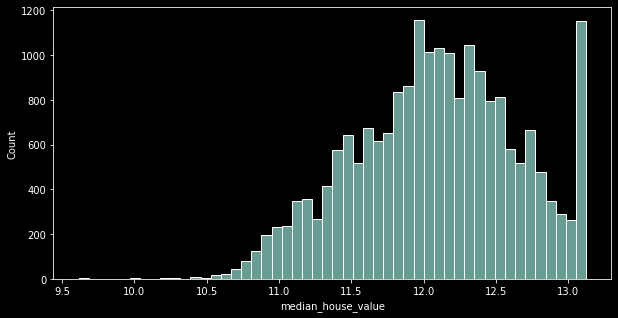

In [13]:
from pandas import unique


print(df.columns)

x = df['median_house_value']

plt.figure(figsize=((10, 5)))
sns.histplot(np.log(x), bins=50)

In [18]:
df.isnull().sum()

print("Total bedrooms column has 207 missing values")

Total bedrooms column has 207 missing values


In [23]:
pop_median = df['population'].median()

print(f"The median value of population is {pop_median}")


The median value of population is 1166.0


In [53]:
len(df)

20640

In [72]:
# Shuffling the data before splitting
n = len(df)

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)
idx


array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [73]:
# Splitting the Dataset into Train, Validation and Test sets

n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)  

print(f"Train set: {n_train}" )
print(f"Validation set: {n_val}" )
print(f"Test set: {n_test}" )

Train set: 12384
Validation set: 4128
Test set: 4128


In [55]:
df = df.set_index(idx) # Ressting the index

In [98]:
# Setting the validation framework
df_train = df.iloc[0: n_train]
df_val = df.iloc[n_train : n_train + n_val]
df_test = df.iloc[n_train + n_val : ]

# Extracting the target variable and using log transformation
train_target = np.log(df_train['median_house_value'])
val_target = np.log(df_val['median_house_value'])
test_target = np.log(df_test['median_house_value'])

In [88]:
# Dropping the target varaible
df_train = df.drop('median_house_value', axis=1)
df_val = df.drop('median_house_value', axis=1)
df_test = df.drop('median_house_value', axis=1)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

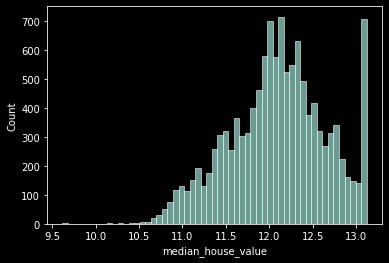

In [102]:
sns.histplot(train_target)